#Exploratory Data Analysis - Terrorism
Problem Statement: Perform ‘Exploratory Data Analysis’ on dataset ‘Global Terrorism’

As a security/defense analyst, try to find out the hot zone of terrorism.

What all security issues and insights you can derive by EDA?

## Author - Sarthak Malik

### Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

In [10]:
df = pd.read_csv("drive/MyDrive/Data/globalterrorismdb_0718dist.csv",encoding ="latin1")

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [11]:
df.head(5)

eventid  iyear  imonth  iday  ... INT_IDEO  INT_MISC INT_ANY  related
0  197000000001   1970       7     2  ...        0         0       0      NaN
1  197000000002   1970       0     0  ...        1         1       1      NaN
2  197001000001   1970       1     0  ...       -9         1       1      NaN
3  197001000002   1970       1     0  ...       -9         1       1      NaN
4  197001000003   1970       1     0  ...       -9         1       1      NaN

[5 rows x 135 columns]

In [12]:
df.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


In [14]:
df.describe()

eventid          iyear  ...       INT_MISC        INT_ANY
count  1.816910e+05  181691.000000  ...  181691.000000  181691.000000
mean   2.002705e+11    2002.638997  ...       0.090010      -3.945952
std    1.325957e+09      13.259430  ...       0.568457       4.691325
min    1.970000e+11    1970.000000  ...      -9.000000      -9.000000
25%    1.991021e+11    1991.000000  ...       0.000000      -9.000000
50%    2.009022e+11    2009.000000  ...       0.000000       0.000000
75%    2.014081e+11    2014.000000  ...       0.000000       0.000000
max    2.017123e+11    2017.000000  ...       1.000000       1.000000

[8 rows x 77 columns]

In [15]:
df.corr()

eventid     iyear    imonth  ...  INT_IDEO  INT_MISC   INT_ANY
eventid    1.000000  0.999996  0.002706  ... -0.133252 -0.077852 -0.175605
iyear      0.999996  1.000000  0.000139  ... -0.133253 -0.077847 -0.175596
imonth     0.002706  0.000139  1.000000  ... -0.002034 -0.002554 -0.006336
iday       0.018336  0.018254  0.005497  ... -0.001621 -0.002027 -0.001199
extended   0.091761  0.091754 -0.000468  ...  0.075147  0.027335  0.080767
...             ...       ...       ...  ...       ...       ...       ...
nreleased -0.181612 -0.181556 -0.011535  ...  0.040947  0.085055  0.064759
INT_LOG   -0.143600 -0.143601 -0.002302  ...  0.996211  0.052537  0.891051
INT_IDEO  -0.133252 -0.133253 -0.002034  ...  1.000000  0.082014  0.893811
INT_MISC  -0.077852 -0.077847 -0.002554  ...  0.082014  1.000000  0.252193
INT_ANY   -0.175605 -0.175596 -0.006336  ...  0.893811  0.252193  1.000000

[77 rows x 77 columns]

### Total terror attack and injuries for U.S citizens

Text(0.5, 0, 'Year')

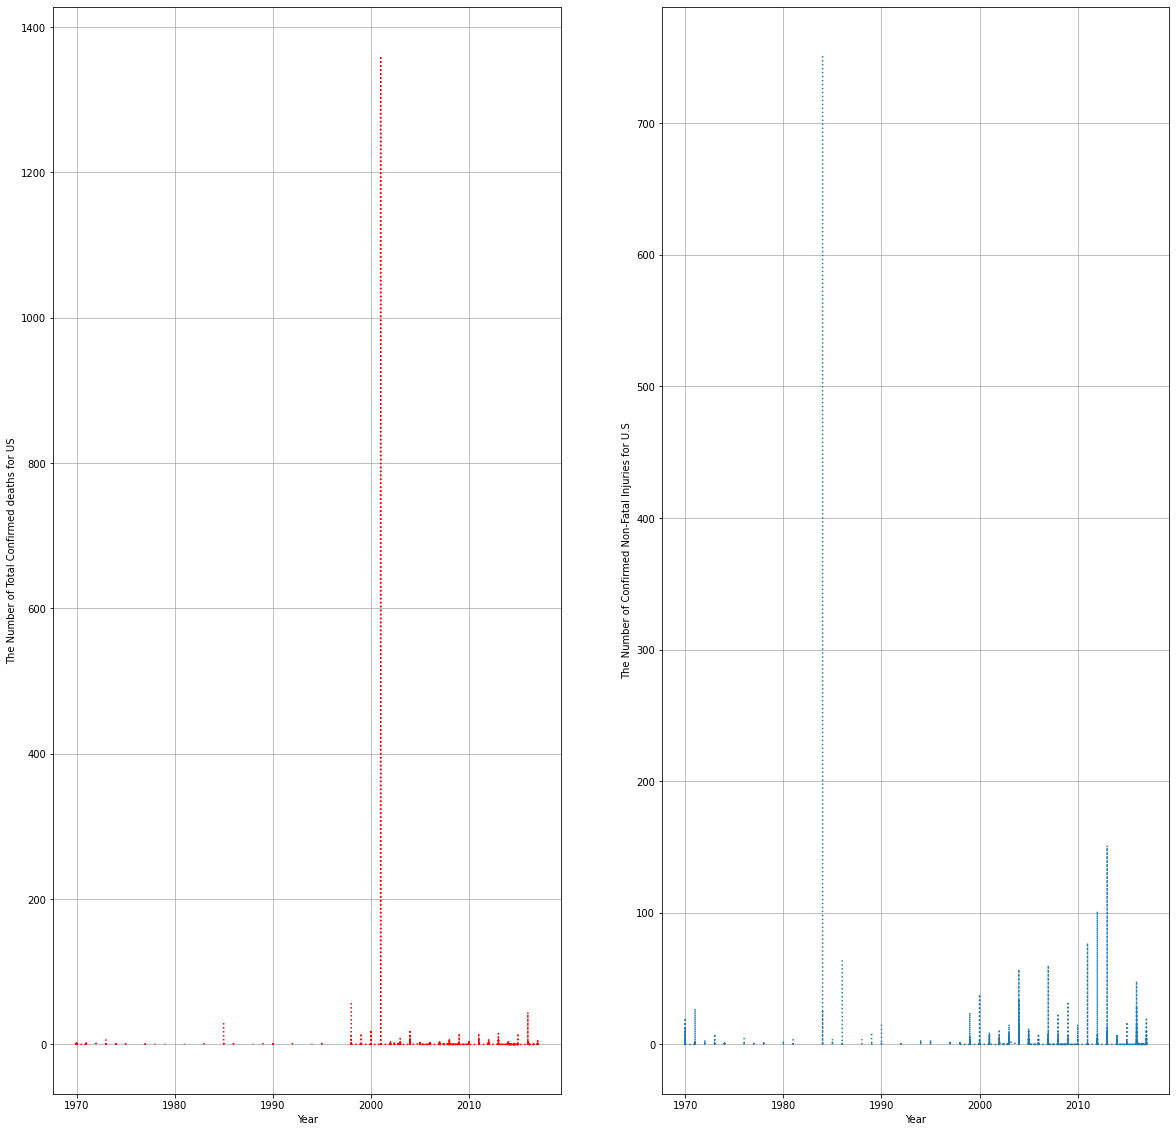

In [34]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(20,20))
ax1.plot(df["iyear"],df["nkillus"],color="red",linestyle = ':')
ax2.plot(df["iyear"],df["nwoundus"],linestyle = ':')
ax1.grid(True)
ax2.grid(True)
ax1.set_ylabel("The Number of Total Confirmed deaths for US")
ax1.set_xlabel("Year")
ax2.set_ylabel("The Number of Confirmed Non-Fatal Injuries for U.S")
ax2.set_xlabel("Year")

### Observation
With time the number of deaths and injuries due to terrorist attack is increasing for U.S citizens. The increase in non-fatale injuries are very high.

### Total terror attack and injuries all over the world

Text(0.5, 0, 'Year')

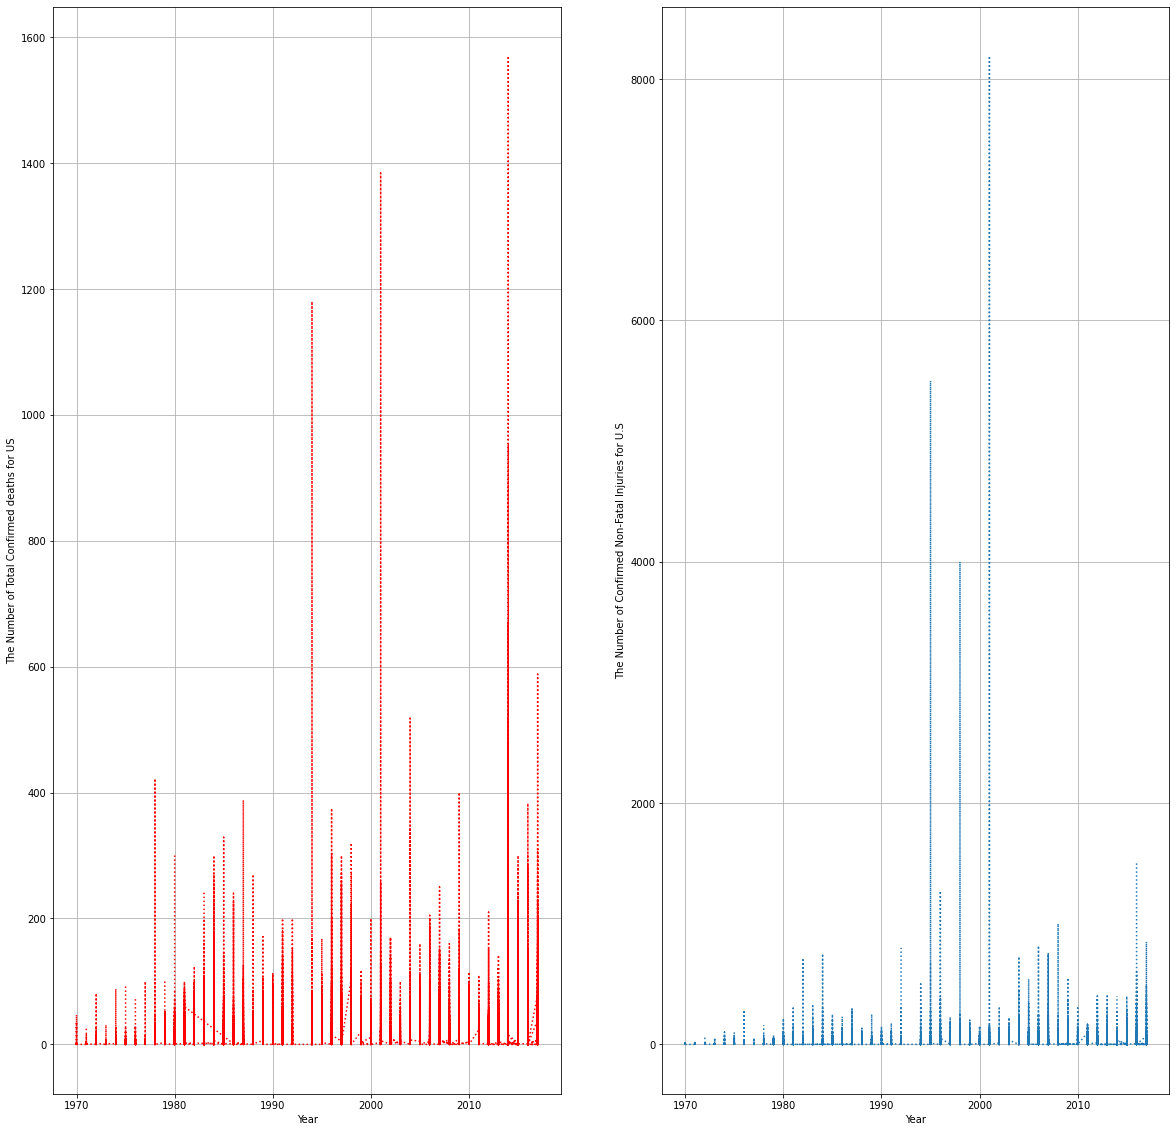

In [35]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(20,20))
ax1.plot(df["iyear"],df["nkill"],color="red",linestyle = ':')
ax2.plot(df["iyear"],df["nwound"],linestyle = ':')
ax1.grid(True)
ax2.grid(True)
ax1.set_ylabel("The Number of Total Confirmed deaths for US")
ax1.set_xlabel("Year")
ax2.set_ylabel("The Number of Confirmed Non-Fatal Injuries for U.S")
ax2.set_xlabel("Year")

### Observation
The increasing in deaths due to terror attacks all over the world is at a alarming rate and is much more than non fatal injuries. This shows the attack on U.S citizen is low as compared to other countries citizens. 

### Now lets analyse terror attack in different regions at a given year

In [36]:
filterYear1 = df['iyear'] == 1970 # For year 1970

In [39]:
filterData1 = df[filterYear1]
reqFilterData1 = filterData1.loc[:,'city':'longitude'] #We are getting the required fields
reqFilterData1 = reqFilterData1.dropna() # drop NaN values 
reqFilterDataList1 = reqFilterData1.values.tolist()

In [40]:
import folium
from folium.plugins import MarkerCluster

In [46]:
map = folium.Map(location = [0, 30], tiles='CartoDB positron', zoom_start=2)
# clustered marker
markerCluster = folium.plugins.MarkerCluster().add_to(map)
for point in range(0, len(reqFilterDataList1)):
    folium.Marker(location=[reqFilterDataList1[point][1],reqFilterDataList1[point][2]], popup = reqFilterDataList1[point][0]).add_to(markerCluster)
map

Now lets have a look in the year 2010

In [44]:
filterYear2 = df['iyear'] == 2010 # For year 2010

In [45]:
filterData2 = df[filterYear2]
reqFilterData2 = filterData2.loc[:,'city':'longitude'] #We are getting the required fields
reqFilterData2 = reqFilterData2.dropna() # drop NaN values 
reqFilterDataList2 = reqFilterData2.values.tolist()

In [47]:
map = folium.Map(location = [0, 30], tiles='CartoDB positron', zoom_start=2)
# clustered marker
markerCluster = folium.plugins.MarkerCluster().add_to(map)
for point in range(0, len(reqFilterDataList2)):
    folium.Marker(location=[reqFilterDataList2[point][1],reqFilterDataList2[point][2]], popup = reqFilterDataList2[point][0]).add_to(markerCluster)
map

Output hidden; open in https://colab.research.google.com to view.

### Observation 
In 1970's most of the terror attack are in U.S region and very few in european and asian region . But in 2010 the attacks in U.S has reduced and attack in asian and european regions have drastically increased. Africa is also facing a problem of terror attacks with time 

In [48]:
killData = df.loc[:,'nkill']
print('Number of people killed by terror attack:', int(sum(killData.dropna())))

Number of people killed by terror attack: 411868


### Lets look into the type of terrorist attack

In [49]:
killData

0         1.0
1         0.0
2         1.0
3         NaN
4         NaN
         ... 
181686    1.0
181687    2.0
181688    0.0
181689    0.0
181690    0.0
Name: nkill, Length: 181691, dtype: float64

In [59]:
attackData = df.loc[:,'attacktype1_txt']

In [60]:
attackData

0                          Assassination
1            Hostage Taking (Kidnapping)
2                          Assassination
3                      Bombing/Explosion
4         Facility/Infrastructure Attack
                       ...              
181686                     Armed Assault
181687                 Bombing/Explosion
181688    Facility/Infrastructure Attack
181689                 Bombing/Explosion
181690                 Bombing/Explosion
Name: attacktype1_txt, Length: 181691, dtype: object

In [61]:
typeKillData = pd.concat([attackData, killData], axis=1)

In [62]:
typeKillData

attacktype1_txt  nkill
0                        Assassination    1.0
1          Hostage Taking (Kidnapping)    0.0
2                        Assassination    1.0
3                    Bombing/Explosion    NaN
4       Facility/Infrastructure Attack    NaN
...                                ...    ...
181686                   Armed Assault    1.0
181687               Bombing/Explosion    2.0
181688  Facility/Infrastructure Attack    0.0
181689               Bombing/Explosion    0.0
181690               Bombing/Explosion    0.0

[181691 rows x 2 columns]

In [76]:
typeKillFormatData = typeKillData.pivot_table(columns='attacktype1_txt', values='nkill', aggfunc='sum')
typeKillFormatData=typeKillFormatData.T
typeKillFormatData

nkill
attacktype1_txt                              
Armed Assault                        160297.0
Assassination                         24920.0
Bombing/Explosion                    157321.0
Facility/Infrastructure Attack         3642.0
Hijacking                              3718.0
Hostage Taking (Barricade Incident)    4478.0
Hostage Taking (Kidnapping)           24231.0
Unarmed Assault                         880.0
Unknown                               32381.0

In [78]:
typeKillFormatData.index

Index(['Armed Assault', 'Assassination', 'Bombing/Explosion',
       'Facility/Infrastructure Attack', 'Hijacking',
       'Hostage Taking (Barricade Incident)', 'Hostage Taking (Kidnapping)',
       'Unarmed Assault', 'Unknown'],
      dtype='object', name='attacktype1_txt')

In [79]:
typeKillFormatData.values

array([[160297.],
       [ 24920.],
       [157321.],
       [  3642.],
       [  3718.],
       [  4478.],
       [ 24231.],
       [   880.],
       [ 32381.]])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  


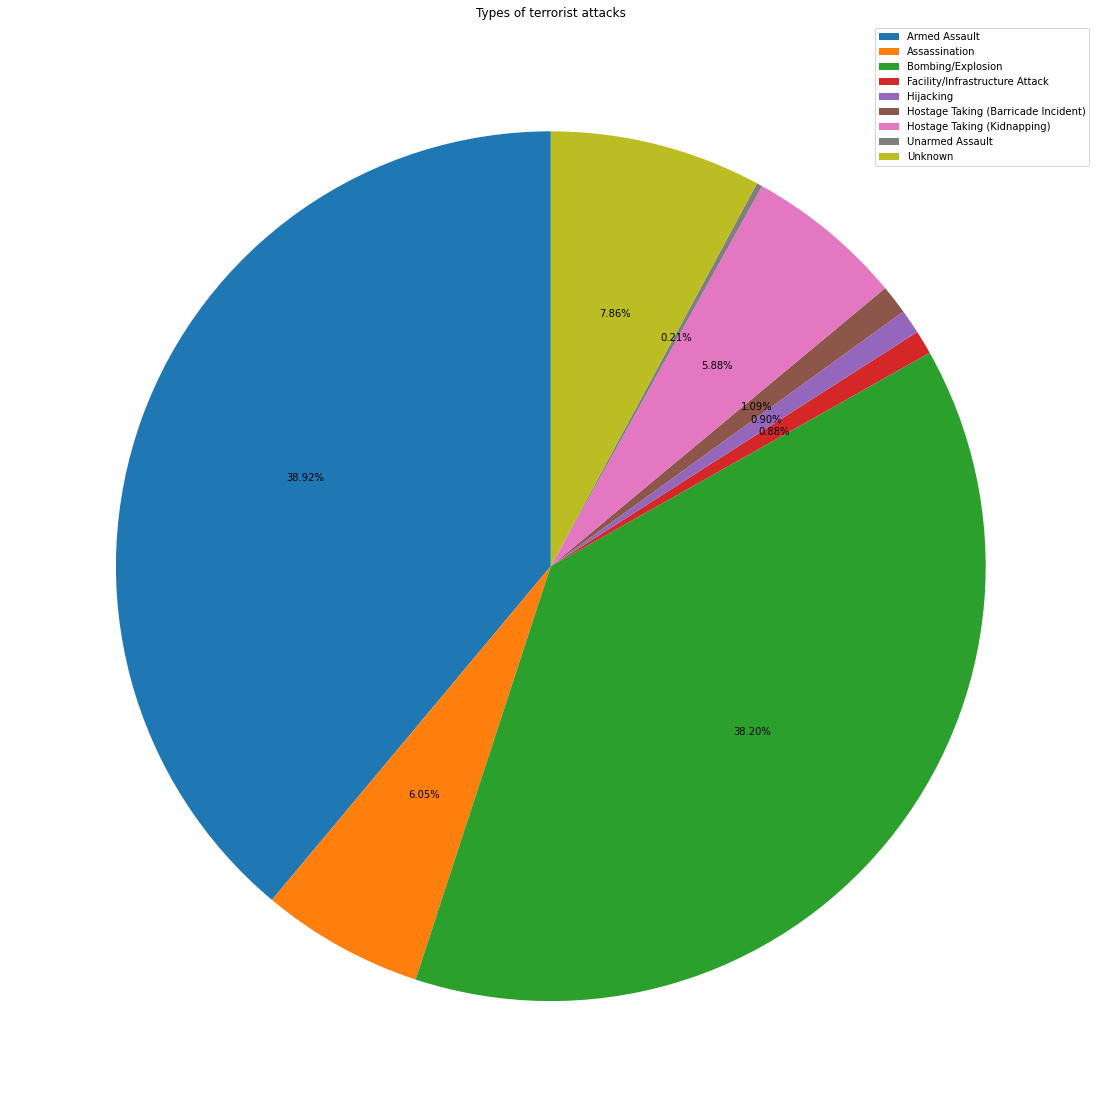

In [82]:
fig, ax = plt.subplots(figsize=(20, 20))
plt.pie(typeKillFormatData.values, startangle=90, autopct='%.2f%%')
plt.title('Types of terrorist attacks')
plt.legend(typeKillFormatData.index, loc='upper right', fontsize=10) # location legend
plt.show()

### Observation
Armed assault and bombing/explosion is used in about 77% of thr terrorist attacks

### Lets now analyse how many are killed from each *country*

In [101]:
countryData = df.loc[:,'country_txt']
# countyData
countryKillData = pd.concat([countryData, killData], axis=1)
countryKillData

country_txt  nkill
0       Dominican Republic    1.0
1                   Mexico    0.0
2              Philippines    1.0
3                   Greece    NaN
4                    Japan    NaN
...                    ...    ...
181686             Somalia    1.0
181687               Syria    2.0
181688         Philippines    0.0
181689               India    0.0
181690         Philippines    0.0

[181691 rows x 2 columns]

In [103]:
countryKillFormatData = countryKillData.pivot_table(columns='country_txt', values='nkill', aggfunc='sum')
countryKillFormatData= countryKillFormatData.T
countryKillFormatData = countryKillFormatData.sort_values("nkill",ascending = False)
countryKillFormatData

nkill
country_txt                 
Iraq                 78589.0
Afghanistan          39384.0
Pakistan             23822.0
Nigeria              22682.0
India                19341.0
...                      ...
St. Kitts and Nevis      0.0
Martinique               0.0
Brunei                   0.0
Iceland                  0.0
South Yemen              0.0

[205 rows x 1 columns]

In [104]:
labels = countryKillFormatData.index
values = countryKillFormatData.values

In [108]:
labels.shape

(205,)

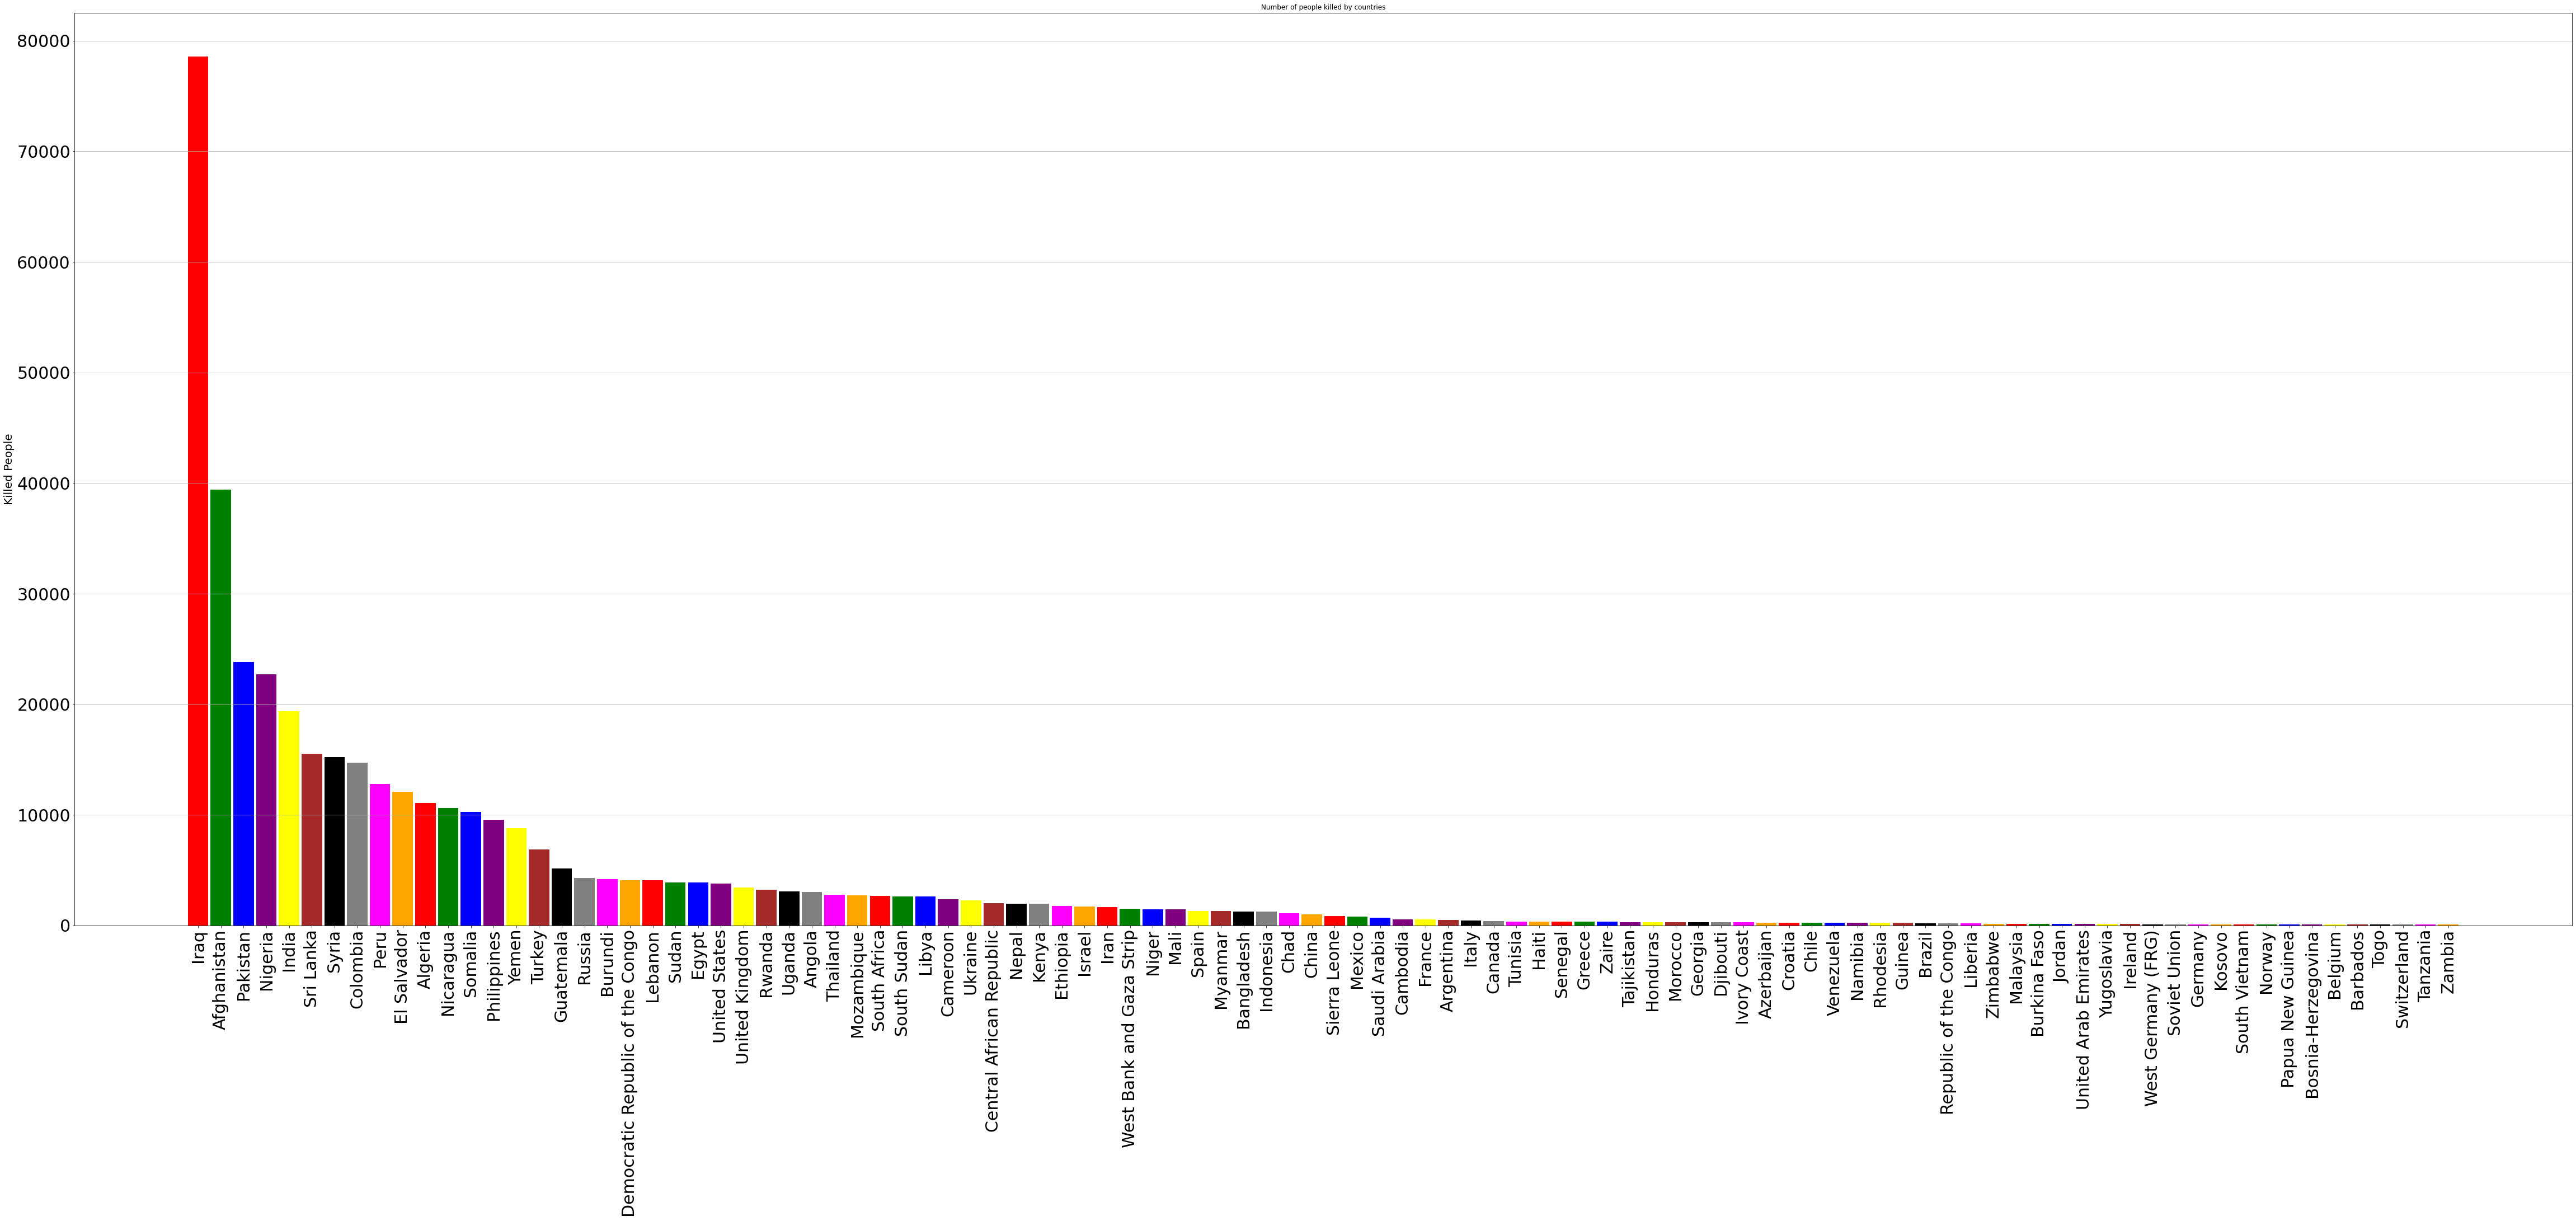

In [137]:
values = [int(i) for i in values] # convert float to int 
fig, ax = plt.subplots(1, 1,figsize=(80,30))
index = np.arange(len(labels))
ax.yaxis.grid(True)
colors = ['red', 'green', 'blue', 'purple', 'yellow', 'brown', 'black', 'gray', 'magenta', 'orange']
plt.bar(index[:100], values[:100],color=colors , width = 0.9)
plt.ylabel('Killed People', fontsize=20)
plt.yticks(fontsize=30)
plt.xticks(index[:100], labels[:100], fontsize=30, rotation=90)
plt.title('Number of people killed by countries')
# print(fig_size)
plt.show()

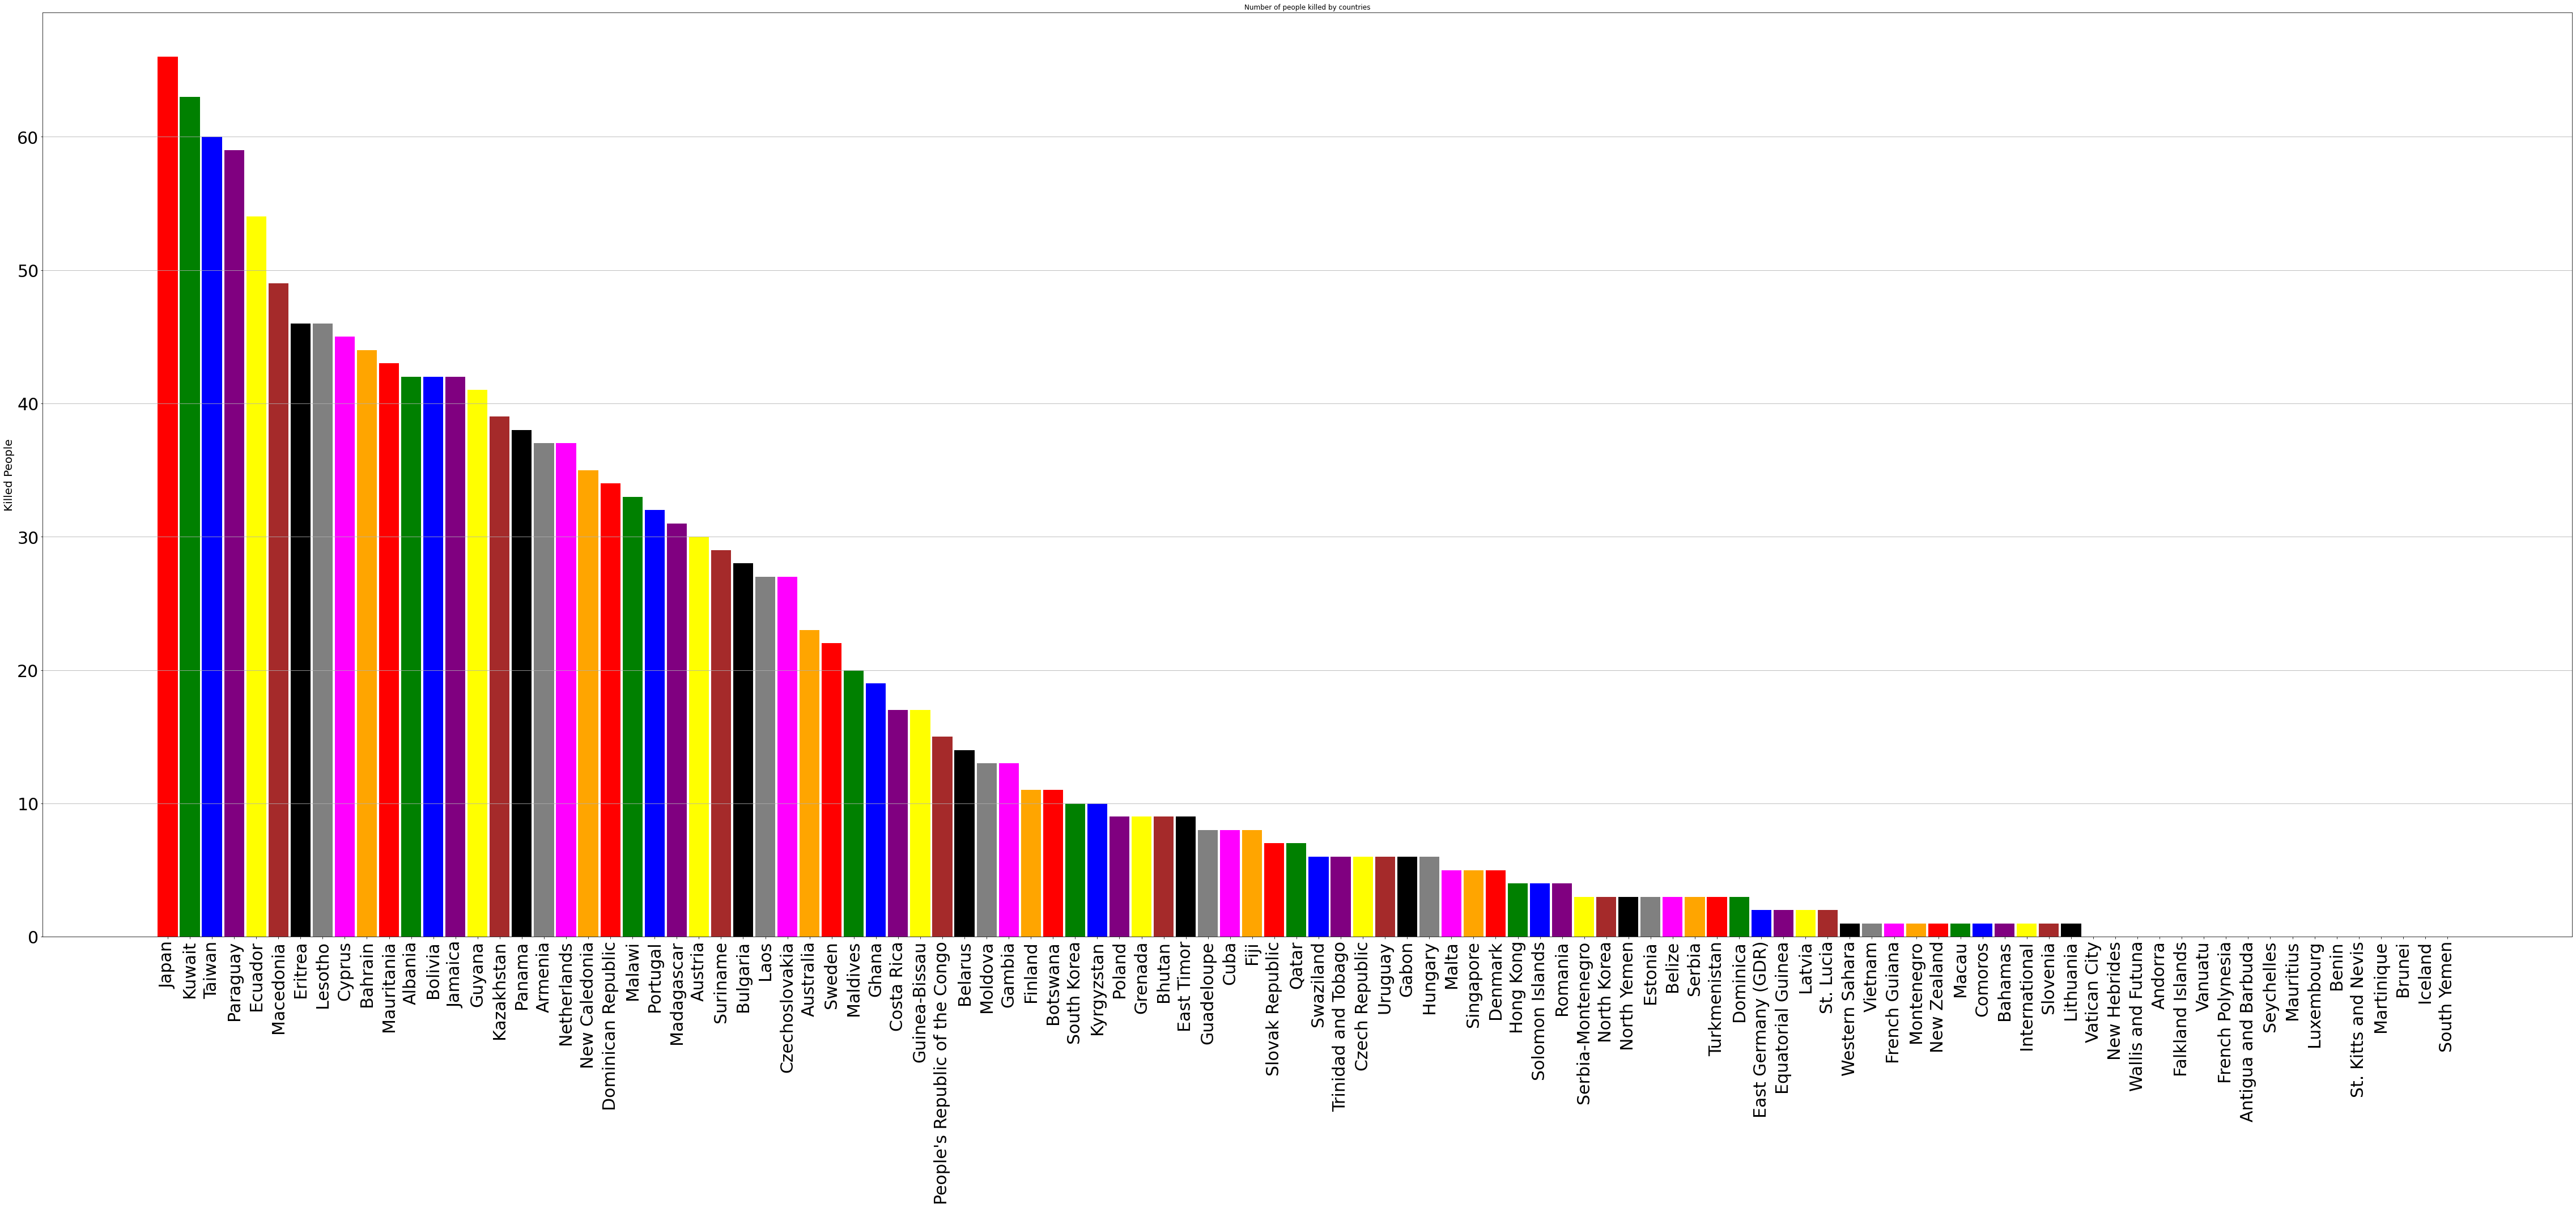

In [138]:
fig, ax = plt.subplots(1, 1,figsize=(80,30))
index = np.arange(len(labels))
ax.yaxis.grid(True)
colors = ['red', 'green', 'blue', 'purple', 'yellow', 'brown', 'black', 'gray', 'magenta', 'orange']
plt.bar(index[101:], values[101:],color=colors , width = 0.9)
plt.ylabel('Killed People', fontsize=20)
plt.yticks(fontsize=30)
plt.xticks(index[101:], labels[101:], fontsize=30, rotation=90)
plt.title('Number of people killed by countries')
# print(fig_size)
plt.show()

### Final Observation
The world hit region or hot spot is the middle east region.Most number of deaths are in countries like Iraq, Afghanistan, Pakistan.  